In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-10 00:00:00+00:00,63055.191406,63446.742188,60208.781250,60792.777344,27804954694,0.0,0.0
2024-05-11 00:00:00+00:00,60793.355469,61451.152344,60492.625000,60793.710938,13842272968,0.0,0.0
2024-05-12 00:00:00+00:00,60793.503906,61818.156250,60632.601562,61448.394531,13800459405,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [10]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-05-10 00:00:00+00:00,63055.191406,63446.742188,60208.781250,60792.777344,27804954694
2024-05-11 00:00:00+00:00,60793.355469,61451.152344,60492.625000,60793.710938,13842272968
2024-05-12 00:00:00+00:00,60793.503906,61818.156250,60632.601562,61448.394531,13800459405


In [8]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

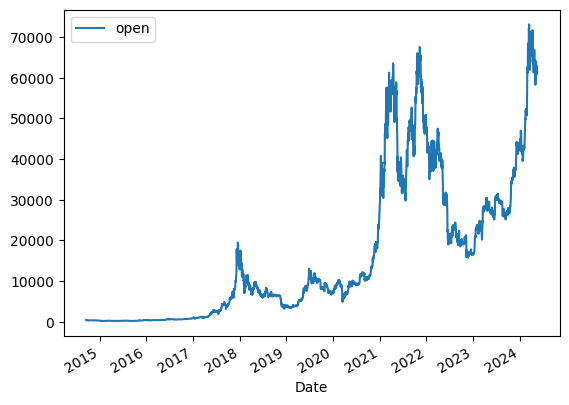

In [11]:
btc.plot.line(y="open", use_index=True)

<Axes: xlabel='Date'>

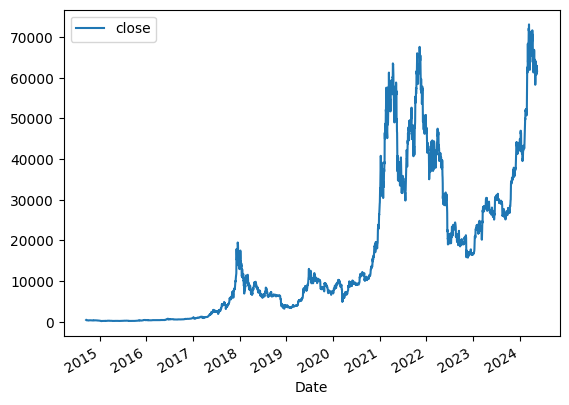

In [16]:
btc.plot.line(y="close", use_index=True)

In [18]:
# Calculando médias móveis
btc['MA_10'] = btc['close'].rolling(window=10).mean()

# Criando o target deslocando 'Close' para trás
btc['Target'] = btc['close'].shift(-1)

# Removendo NaNs
btc.dropna(inplace=True)


In [19]:
from sklearn.model_selection import train_test_split

# Features e Target
X = btc[['close', 'MA_10']]
y = btc['Target']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 742472.1333456152


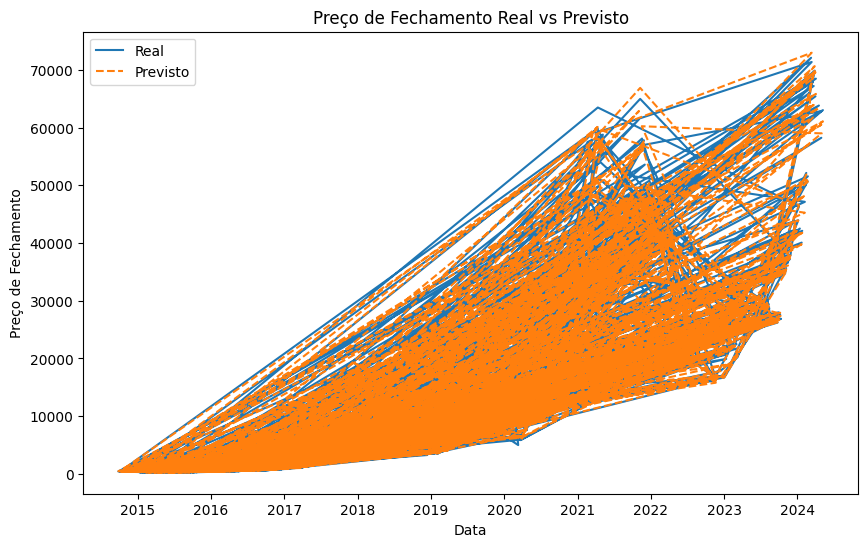

In [24]:
import matplotlib.pyplot as plt  # Correção aqui

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, label='Previsto', linestyle='--')
plt.legend()
plt.title('Preço de Fechamento Real vs Previsto')
plt.xlabel('Data')  # Adicionando rótulos aos eixos pode ser útil
plt.ylabel('Preço de Fechamento')
plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Suponha que 'btc' seja um DataFrame já carregado com os dados do Bitcoin

def add_features(df):
    """Adiciona médias móveis e o target ao DataFrame."""
    df['MA_10'] = df['close'].rolling(window=10).mean()
    df['Target'] = df['close'].shift(-1)
    df.dropna(inplace=True)

def prepare_data(data, n_steps):
    """Prepara os dados para treinamento."""
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x, seq_y = data[i:i + n_steps], data[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def normalize_data(data):
    """Normaliza os dados."""
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data.reshape(-1, 1)), scaler



In [70]:
# train ratio é o conjunto de dados alocado para treinar o modelo
# validation é o ajuste dos hiperparametros para evitar overfiting
# os valores utilizados aqui é pra entender um comportamento de predição futura


def split_data(X, y, train_ratio=0.7, validation_ratio=0.25):
    """Divide os dados em conjuntos de treinamento, validação e teste."""
    total_samples = len(X)
    train_size = int(total_samples * train_ratio)
    validation_size = int(total_samples * validation_ratio)
    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size + validation_size], y[train_size:train_size + validation_size]
    X_test, y_test = X[train_size + validation_size:], y[train_size + validation_size:]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [71]:

def build_model(n_steps):
    """Constrói o modelo LSTM com atenção."""
    input_layer = Input(shape=(n_steps, 1))
    lstm_out = LSTM(50, return_sequences=True)(input_layer)
    attention = tf.keras.layers.Attention()([lstm_out, lstm_out])
    attention_output = Concatenate()([lstm_out, attention])
    flat_output = Flatten()(attention_output)
    dense_layer = Dense(50, activation='relu')(flat_output)
    output_layer = Dense(1)(dense_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

In [72]:
# Main execution block
add_features(btc)
btc_array, scaler = normalize_data(btc['close'].values)
n_steps = 30
X, y = prepare_data(btc_array, n_steps)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

model = build_model(n_steps)
model.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 30, 1)]              0         []                            
                                                                                                  
 lstm_10 (LSTM)              (None, 30, 50)               10400     ['input_11[0][0]']            
                                                                                                  
 attention_10 (Attention)    (None, 30, 50)               0         ['lstm_10[0][0]',             
                                                                     'lstm_10[0][0]']             
                                                                                                  
 concatenate_10 (Concatenat  (None, 30, 100)              0         ['lstm_10[0][0]',       

In [74]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
from kerastuner import HyperModel
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(Input(shape=self.input_shape))

        # Otimizando o número de unidades e a taxa de dropout em uma camada LSTM
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                       return_sequences=True,
                       dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(1))

        # Otimizando a taxa de aprendizado
        lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(optimizer=Adam(learning_rate=lr), loss='mse')

        return model

# Definindo o hipermodelo
hypermodel = LSTMHyperModel(input_shape=(X_train.shape[1], X_train.shape[2]))

# Configurando o tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Iniciando a busca
tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Obtendo o melhor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_models=1)[0]

print("Melhores hiperparâmetros:", best_hyperparameters.values)
test_loss = best_model.evaluate(X_test, y_test)


Trial 7 Complete [00h 01m 30s]
val_loss: 0.005262122489511967

Best val_loss So Far: 0.003567059407941997
Total elapsed time: 00h 13m 46s

Search: Running Trial #8

Value             |Best Value So Far |Hyperparameter
192               |192               |units
0.2               |0                 |dropout
0.001             |0.01              |learning_rate

Epoch 1/20
74/74 [==============================] - 8s 86ms/step - loss: 0.0059 - val_loss: 0.0115
Epoch 2/20
74/74 [==============================] - 4s 54ms/step - loss: 0.0041 - val_loss: 0.0099
Epoch 3/20
74/74 [==============================] - 4s 54ms/step - loss: 0.0039 - val_loss: 0.0095
Epoch 4/20
74/74 [==============================] - 6s 81ms/step - loss: 0.0036 - val_loss: 0.0085
Epoch 5/20
74/74 [==============================] - 4s 55ms/step - loss: 0.0035 - val_loss: 0.0087
Epoch 6/20
74/74 [==============================] - 4s 54ms/step - loss: 0.0032 - val_loss: 0.0087
Epoch 7/20
74/74 [===========================

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
test_loss = model.evaluate(X_test, y_test)

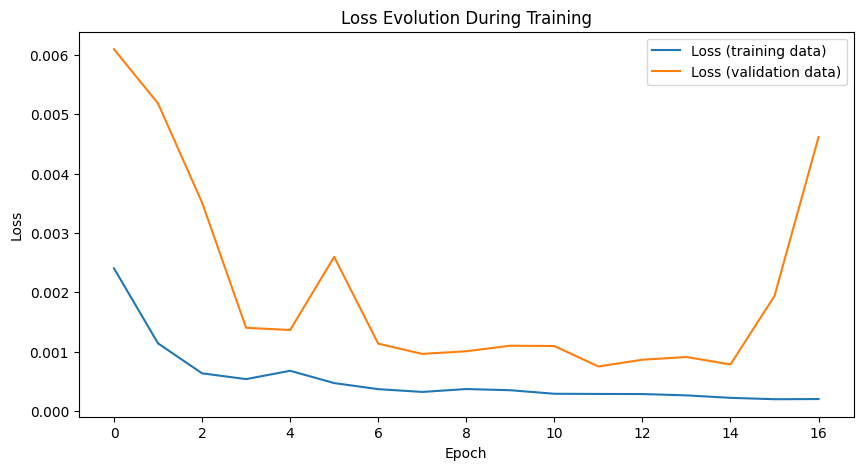

In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plota a perda e a perda de validação ao longo das épocas."""
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Loss (training data)')
    plt.plot(history.history['val_loss'], label='Loss (validation data)')
    plt.title('Loss Evolution During Training')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc="upper right")
    plt.show()

plot_training_history(history)

17/17 [==============================] - 1s 9ms/step


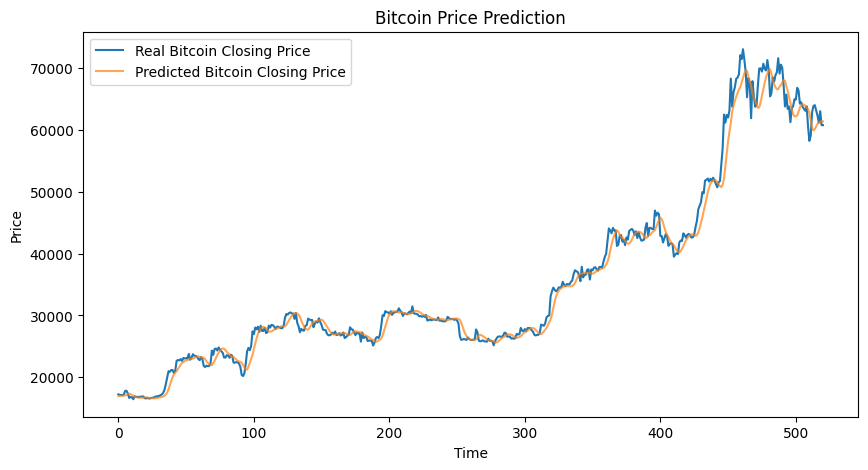

In [28]:
def plot_predictions(X_test, y_test, model, scaler):
    """Plota as previsões do modelo em comparação com os valores reais."""
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test)

    plt.figure(figsize=(10, 5))
    plt.plot(y_test_rescaled, label='Real Bitcoin Closing Price')
    plt.plot(predictions_rescaled, label='Predicted Bitcoin Closing Price', alpha=0.7)
    plt.title('Bitcoin Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_predictions(X_test, y_test, model, scaler)


In [29]:
def predict_future_steps(model, initial_input, steps, scaler):
    """Faz previsões futuras baseadas nos últimos n_steps dados conhecidos.

    Args:
        model: O modelo treinado LSTM.
        initial_input: Os últimos n_steps dados conhecidos (formato array 2D).
        steps: Número de passos futuros a prever.
        scaler: O objeto scaler usado para normalizar os dados.

    Returns:
        Uma lista das previsões futuras.
    """
    current_input = initial_input
    future_predictions = []

    for _ in range(steps):
        # Prever o próximo passo
        next_prediction = model.predict(current_input[np.newaxis, :, :])
        future_predictions.append(scaler.inverse_transform(next_prediction)[0][0])

        # Atualizar o current_input para incluir a nova previsão
        current_input = np.append(current_input[1:], next_prediction, axis=0)

    return future_predictions

# Supondo que você tem `btc_array` como seu conjunto de dados completo:
last_input = btc_array[-n_steps:]  # Pega os últimos n_steps valores para a entrada inicial
future_steps = 5  # Define quantos passos no futuro você gostaria de prever

# Chamada para prever futuros passos não conhecidos
future_predictions = predict_future_steps(model, last_input, future_steps, scaler)

print("Previsões futuras:", future_predictions)


1/1 [==============================] - 0s 24ms/step
Previsões futuras: [61226.195, 61047.152, 60863.293, 60674.23, 60437.81]


In [30]:
def make_predictions(model, X, scaler):
    """Função para fazer previsões com base em dados de entrada."""
    predictions = model.predict(X)
    return scaler.inverse_transform(predictions)

# Fazendo previsões sobre o conjunto de teste e de treinamento para visualização
train_predictions = make_predictions(model, X_train, scaler)
test_predictions = make_predictions(model, X_test, scaler)


17/17 [==============================] - 0s 6ms/step


In [31]:
# Usamos a função predict_future_steps definida anteriormente para prever os próximos 365 dias
future_predictions = predict_future_steps(model, btc_array[-n_steps:], 365, scaler)


1/1 [==============================] - 0s 22ms/step


In [33]:
import plotly.graph_objects as go

def plot_btc_with_predictions_plotly(btc, train_predictions, test_predictions, future_predictions):
    # Criando o gráfico
    fig = go.Figure()

    # Adicionando série de dados reais
    fig.add_trace(go.Scatter(x=btc.index, y=btc['close'], mode='lines', name='Real Bitcoin Closing Price'))

    # Adicionando previsões de treinamento
    train_pred_index = btc.index[n_steps:n_steps + len(train_predictions)]
    fig.add_trace(go.Scatter(x=train_pred_index, y=train_predictions.flatten(), mode='lines', name='Train Predictions'))

    # Adicionando previsões de teste
    test_pred_index = btc.index[len(btc) - len(test_predictions):]
    fig.add_trace(go.Scatter(x=test_pred_index, y=test_predictions.flatten(), mode='lines', name='Test Predictions'))

    # Adicionando previsões futuras
    future_pred_index = pd.date_range(start=btc.index[-1], periods=len(future_predictions) + 1, freq='D')[1:]
    fig.add_trace(go.Scatter(x=future_pred_index, y=future_predictions, mode='lines', name='Future Predictions', line=dict(color='red')))

    # Atualizando layout para adicionar título e labels
    fig.update_layout(title='Bitcoin Closing Price Prediction', xaxis_title='Date', yaxis_title='Price', hovermode='x')

    # Habilitando zoom e pan
    fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="date"))

    fig.show()

# Chamada à função para criar o gráfico
plot_btc_with_predictions_plotly(btc, train_predictions, test_predictions, future_predictions)


In [ ]:
def forecast(model, initial_input, n_days, scaler):
    """Gerar previsões futuras a partir de uma entrada inicial."""
    current_input = initial_input
    predictions = []

    for _ in range(n_days):
        # Prever o próximo passo
        next_prediction = model.predict(current_input[np.newaxis, :, :])
        predictions.append(scaler.inverse_transform(next_prediction)[0][0])

        # Atualizar a entrada para incluir a nova previsão
        current_input = np.roll(current_input, -1)
        current_input[-1] = next_prediction

    return predictions

# Exemplo de uso:
# Suponha que `last_input` seja seu último conjunto de entradas conhecidas (por exemplo, os últimos 30 dias de preços)
# `n_days` é o número de dias para prever
predictions = forecast(model, last_input, n_days=30, scaler)


In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfs = tfp.sts

# Suponha que você tenha dados de séries temporais em `data`
# Construindo um modelo de espaço de estados
model = tfs.StructuralTimeSeries(
    observed_time_series=data
)

# Ajustando o modelo
variational_posteriors = tfp.sts.build_factored_surrogate_posterior(model=model)
num_variational_steps = 200  # Número de passos de otimização
optimizer = tf.optimizers.Adam(learning_rate=0.1)

# Otimização do ELBO negativo
neg_log_likelihood = lambda: -model.joint_log_prob(data)
train_op = tf.function(lambda: optimizer.minimize(neg_log_likelihood, var_list=variational_posteriors.trainable_variables))

for step in range(num_variational_steps):
    train_op()

# Previsão
forecast_dist = tfp.sts.forecast(
    model,
    observed_time_series=data,
    parameter_samples=variational_posteriors.sample(50),
    num_steps_forecast=50
)
mean_forecast = forecast_dist.mean()
